In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as stats
import zipfile
from IPython.display import Image

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [7]:
with zipfile.ZipFile('archive.zip') as zip_folder:
    with zip_folder.open('openpowerlifting.csv') as myZip:
        df_main = pd.read_csv(myZip) 

df_main.head()

C:\Users\raflg\AppData\Local\Temp\ipykernel_1416\1311266357.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_main = pd.read_csv(myZip)


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [8]:
df_main.shape

(1423354, 37)

In [9]:
df_main.dtypes

Name                object
Sex                 object
Event               object
Equipment           object
Age                float64
AgeClass            object
Division            object
BodyweightKg       float64
WeightClassKg       object
Squat1Kg           float64
Squat2Kg           float64
Squat3Kg           float64
Squat4Kg           float64
Best3SquatKg       float64
Bench1Kg           float64
Bench2Kg           float64
Bench3Kg           float64
Bench4Kg           float64
Best3BenchKg       float64
Deadlift1Kg        float64
Deadlift2Kg        float64
Deadlift3Kg        float64
Deadlift4Kg        float64
Best3DeadliftKg    float64
TotalKg            float64
Place               object
Wilks              float64
McCulloch          float64
Glossbrenner       float64
IPFPoints          float64
Tested              object
Country             object
Federation          object
Date                object
MeetCountry         object
MeetState           object
MeetName            object
d

# Clean up the database

In [11]:
df_main['Sex'] = df_main['Sex'].astype('category')
df_main['Event'] = df_main['Event'].astype('category')
df_main['Equipment'] = df_main['Equipment'].astype('category')
df_main['AgeClass'] = df_main['AgeClass'].astype('category')
df_main['Division'] = df_main['Division'].astype('category')
df_main['WeightClassKg'] = df_main['WeightClassKg'].astype('category')
df_main['Place'] = df_main['Place'].astype('category')
df_main['Tested'] = df_main['Tested'].astype('category')
df_main['Country'] = df_main['Country'].astype('category')
df_main['Federation'] = df_main['Federation'].astype('category')
df_main['MeetCountry'] = df_main['MeetCountry'].astype('category')
df_main['MeetState'] = df_main['MeetState'].astype('category')
df_main['MeetName'] = df_main['MeetName'].astype('category')
df_main['Date'] = pd.to_datetime(df_main['Date'])

In [12]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Name             1423354 non-null  object        
 1   Sex              1423354 non-null  category      
 2   Event            1423354 non-null  category      
 3   Equipment        1423354 non-null  category      
 4   Age              757527 non-null   float64       
 5   AgeClass         786800 non-null   category      
 6   Division         1415176 non-null  category      
 7   BodyweightKg     1406622 non-null  float64       
 8   WeightClassKg    1410042 non-null  category      
 9   Squat1Kg         337580 non-null   float64       
 10  Squat2Kg         333349 non-null   float64       
 11  Squat3Kg         323842 non-null   float64       
 12  Squat4Kg         3696 non-null     float64       
 13  Best3SquatKg     1031450 non-null  float64       
 14  Be

In [13]:
df_main.duplicated().sum()
df_main.loc[df_main.duplicated(keep=False)]
df_main.drop_duplicates(keep='first', inplace=True)

# Task 1: Compare the Ratio (Total/Body weight)
### H0 : The ratio is the same between 1990's and 2000's

In [14]:
columns_filt = ['Name', 'Sex', 'Date', 'BodyweightKg', 'Equipment', 'MeetCountry', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']
df_ratio = df_main[columns_filt].copy()

In [15]:
df_ratio[['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']] = \
    df_ratio[['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].fillna(0)

In [16]:
df_ratio = df_ratio.loc[(df_ratio['BodyweightKg'] > 0) & (df_ratio['Best3SquatKg'] > 0) & (df_ratio['Best3BenchKg'] > 0) & 
                        (df_ratio['Best3DeadliftKg'] > 0)]

In [17]:
df_ratio['TotalKg'] = df_ratio['Best3SquatKg'] + df_ratio['Best3BenchKg'] + df_ratio['Best3DeadliftKg']
df_ratio['Ratio'] = (df_ratio['TotalKg'] / df_ratio['BodyweightKg']).round(1)
df_ratio

,Name,Sex,Date,BodyweightKg,Equipment,MeetCountry,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Ratio
0,Abbie Murphy,F,2018-10-27,59.8,Wraps,Australia,105.0,55.0,130.0,290.0,4.8
1,Abbie Tuong,F,2018-10-27,58.5,Wraps,Australia,120.0,67.5,145.0,332.5,5.7
3,Amy Moldenhauer,F,2018-10-27,60.0,Wraps,Australia,105.0,72.5,132.5,310.0,5.2
4,Andrea Rowan,F,2018-10-27,104.0,Wraps,Australia,140.0,80.0,170.0,390.0,3.8
5,April Alvarez,F,2018-10-27,74.0,Wraps,Australia,142.5,82.5,145.0,370.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1423347,Adam Jasiński,M,2017-04-01,78.0,Raw,Poland,215.0,115.0,207.5,537.5,6.9
1423348,Włodzimierz Żmijewski,M,2017-04-01,72.7,Raw,Poland,200.0,70.0,235.0,505.0,6.9
1423349,Marian Cafalik,M,2017-04-01,73.5,Raw,Poland,175.0,87.5,190.0,452.5,6.2
1423350,Marian Piwowarczyk,M,2017-04-01,63.5,Raw,Poland,110.0,95.0,170.0,375.0,5.9


In [18]:
decades_cond = [(df_ratio['Date'] >= '1990-01-01') & (df_ratio['Date'] < '2000-01-01'),
                (df_ratio['Date'] >= '2000-01-01') & (df_ratio['Date'] < '2010-01-01')]

decades_res = ['1990s', '2000s']

df_ratio['Decade'] = np.select(decades_cond, decades_res)

In [19]:
df_ratio_desc = df_ratio[(df_ratio['Decade'] == '1990s') | (df_ratio['Decade'] == '2000s')]
df_ratio_desc.groupby(['Decade', 'Sex'])['Ratio'].describe().round(2)

count  mean   std  min  25%  50%  75%   max
Decade Sex                                               
1990s  F    10982.0  5.57  1.30  1.7  4.7  5.5  6.5  10.1
       M    44061.0  6.97  1.42  0.7  6.0  7.0  7.9  12.1
2000s  F    18384.0  5.75  1.48  1.1  4.7  5.7  6.7  10.9
       M    72103.0  7.00  1.59  0.7  5.9  7.0  8.1  13.3

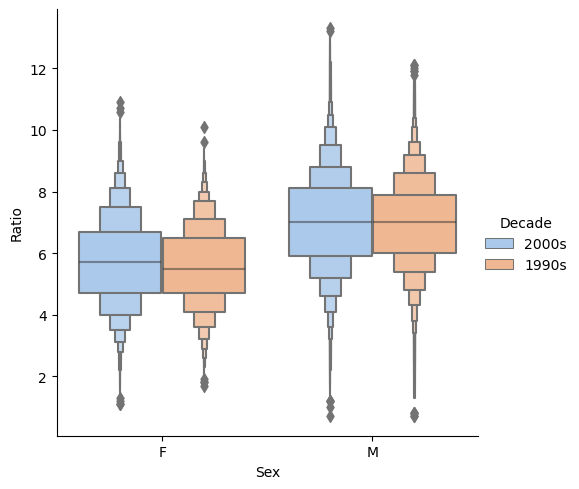

In [20]:
sns.catplot(data=df_ratio_desc, x='Sex', y='Ratio', hue='Decade', kind='boxen', palette='pastel')

In [21]:
df_ttest = pd.crosstab(df_ratio_desc['Name'], df_ratio_desc['Decade'], values=df_ratio_desc['Ratio'], aggfunc='max').dropna()
df_ttest

Decade,1990s,2000s
Name,,
A-Yun Lin,6.8,6.9
A. Baker,6.1,4.8
A. Christo,6.8,6.5
A. Hawkins,6.5,6.9
A. Henderson,7.1,7.4
...,...,...
Štefan Koľšovský,9.4,9.1
Štefan Sokoly,8.2,9.9
Štefan Zvada,6.5,6.9


In [22]:
stat_, p_ = stats.ttest_rel(a=df_ttest['1990s'], b=df_ttest['2000s'], alternative='less')

if p_ < 0.05:
    print('p-value < 0.05, we rejected H0. The ratio are different between the 1990s and the 2000s')
else:
    print('p-value > 0.05, we fail to rejected H0. The ratio are the same between the 1990s and the 2000s')

p-value < 0.05, we rejected H0. The ratio are different between the 1990s and the 2000s


In [23]:
for sex in df_ratio_desc.Sex.unique():
    df_ttest2 = pd.crosstab(df_ratio_desc.loc[df_ratio_desc['Sex'] == sex]['Name'], 
                           df_ratio_desc.loc[df_ratio_desc['Sex'] == sex]['Decade'], 
                           values=df_ratio_desc.loc[df_ratio_desc['Sex'] == sex]['Ratio'], 
                           aggfunc='median').dropna()
    stat_, p_ = stats.ttest_rel(a=df_ttest2['1990s'], b=df_ttest2['2000s'], alternative='less')
    print(sex)
    print('--------')
    if p_ < 0.05:
        print(f'p-value < 0.05, we rejected H0. The ratio are different for the {sex} between the 1990s and the 2000s \n')
    else:
        print(f'p-value > 0.05, we fail to rejected H0. The ratio are the same for the {sex} between the 1990s and the 2000s \n')


F
--------
p-value < 0.05, we rejected H0. The ratio are different for the F between the 1990s and the 2000s 

M
--------
p-value < 0.05, we rejected H0. The ratio are different for the M between the 1990s and the 2000s 



# Task 2: Compare Ratio over the years depending of the equipment 

In [24]:
df_ratio['Equipment'].value_counts()

Single-ply    584481
Raw           270158
Wraps          97534
Multi-ply      26590
Straps             0
Name: Equipment, dtype: int64

In [26]:
ratio_comparison = df_ratio.groupby([pd.Grouper(key='Date', freq='Y'), 'Equipment', 'Sex'])['Ratio'].median().reset_index()
ratio_comparison = ratio_comparison.loc[ratio_comparison['Equipment'] != 'Straps']
ratio_comparison['Ratio'] = ratio_comparison['Ratio'].fillna(0)
ratio_comparison['Date'] = ratio_comparison['Date'].dt.strftime('%Y')
ratio_comparison

,Date,Equipment,Sex,Ratio
0,1964,Multi-ply,F,0.0
1,1964,Multi-ply,M,0.0
2,1964,Raw,F,0.0
3,1964,Raw,M,0.0
4,1964,Single-ply,F,0.0
...,...,...,...,...
553,2019,Raw,M,6.2
554,2019,Single-ply,F,4.1
555,2019,Single-ply,M,5.4
558,2019,Wraps,F,4.7


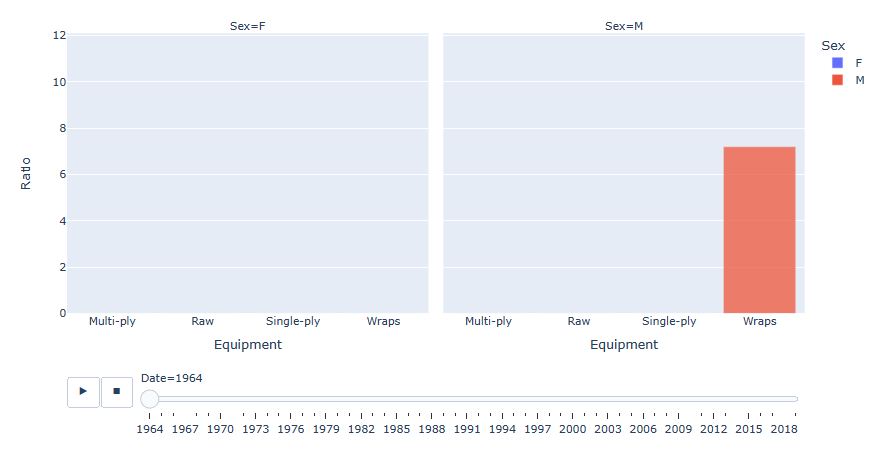

In [33]:
maxrange_y = ratio_comparison['Ratio'].max() + 1
px.bar(ratio_comparison, x='Equipment', y='Ratio', animation_frame = 'Date', facet_col = 'Sex', color ='Sex',
      opacity = 0.75, range_y=[0, maxrange_y])

Image(filename='powerlifting_capture1.PNG') 

# Task 3: Compare how many athletes compete Raw over the years

In [35]:
nb_athl_raw = df_main.groupby(pd.Grouper(key='Date', freq='Y')).agg(PCT=('Equipment', lambda x: (x=='Raw').sum()))
nb_athl_raw.head()

,PCT
Date,
1964-12-31,0
1965-12-31,3
1966-12-31,9
1967-12-31,1
1968-12-31,2


In [36]:
nb_athl_total = df_main.groupby(pd.Grouper(key='Date', freq='Y')).agg(PCT=('Name', 'count'))
nb_athl_total.head()

,PCT
Date,
1964-12-31,21
1965-12-31,45
1966-12-31,50
1967-12-31,44
1968-12-31,63


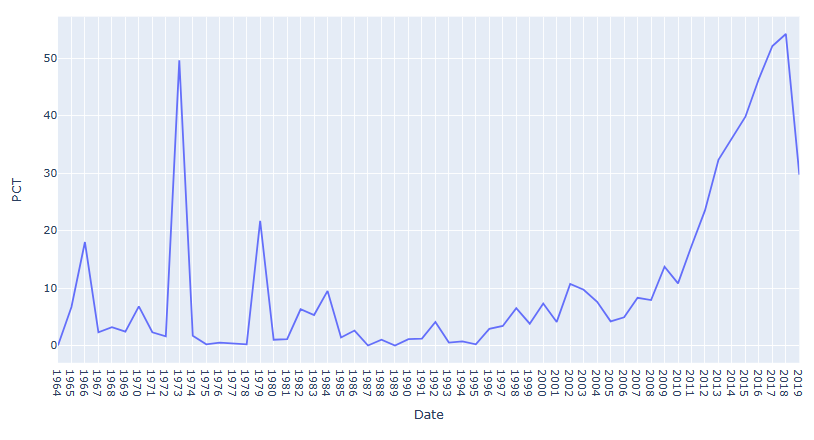

In [38]:
nb_athl_raw_pct = (nb_athl_raw.div(nb_athl_total)*100).reset_index().round(1)
nb_athl_raw_pct['Date'] = nb_athl_raw_pct['Date'].dt.strftime('%Y')

px.line(nb_athl_raw_pct, x='Date', y='PCT')

Image(filename='powerlifting_capture2.PNG') 